In [ ]:
#TASK-1 ---- PREDICTION USING SUPERVISED ML
#----Predict the percentage of an student based on the no. of study hours
#----By--Aarti Mohapatra

In [3]:
#importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#reading data from the given link
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.isnull == True

False

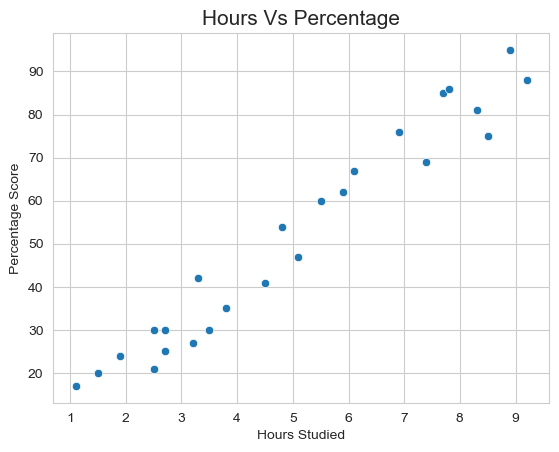

In [5]:
#plotting the distribution of scores
sns.set_style('whitegrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plot.title('Hours Vs Percentage',size=15)
plot.ylabel('Percentage Score', size=10)
plot.xlabel('Hours Studied', size=10)
plot.show()

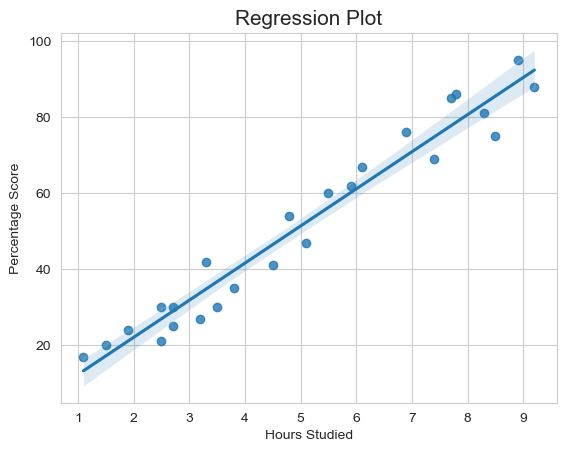

In [6]:
#plotting the correlation between percentage score and hours studied
sns.regplot(x= data['Hours'], y= data['Scores'])
plot.title('Regression Plot',size=15)
plot.ylabel('Percentage Score', size=10)
plot.xlabel('Hours Studied', size=10)
plot.show()

In [7]:
#training the model
print(data.corr())
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("TRAINING COMPLETE")

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000
TRAINING COMPLETE


In [9]:
#predicting the percentage score
y_pred = regressor.predict(X_val)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_val], 'Predicted Percentage': [k for k in y_pred]})
prediction


,Hours,Predicted Percentage
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [11]:
#comparing percentage score with actual acore
compare_scores = pd.DataFrame({'Actual Percentage': y_val, 'Predicted Percentage': y_pred})
compare_scores


,Actual Percentage,Predicted Percentage
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


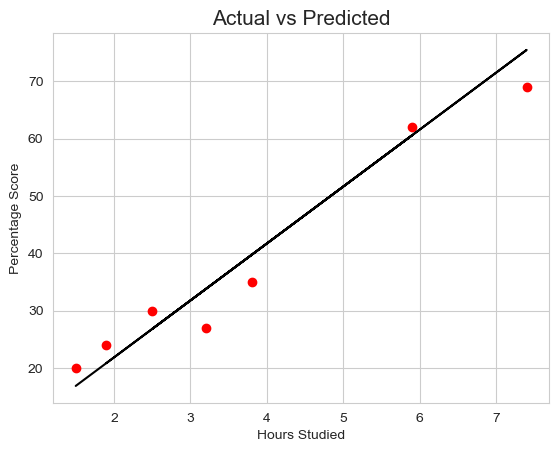

In [12]:
#plotting the graph comparing percentage score and actual score
plot.scatter(x=X_val, y=y_val, color='red')
plot.plot(X_val, y_pred, color='Black')
plot.title('Actual vs Predicted', size=15)
plot.ylabel('Percentage Score', size=10)
plot.xlabel('Hours Studied', size=10)
plot.show()


In [13]:
#calculating the mean absolute error
print('Mean absolute error: ',mean_absolute_error(y_val,y_pred))

Mean absolute error:  4.130879918502486


In [14]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))
    

Score = 93.893
